In [1]:
# import all required libraries

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor # For regression task
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

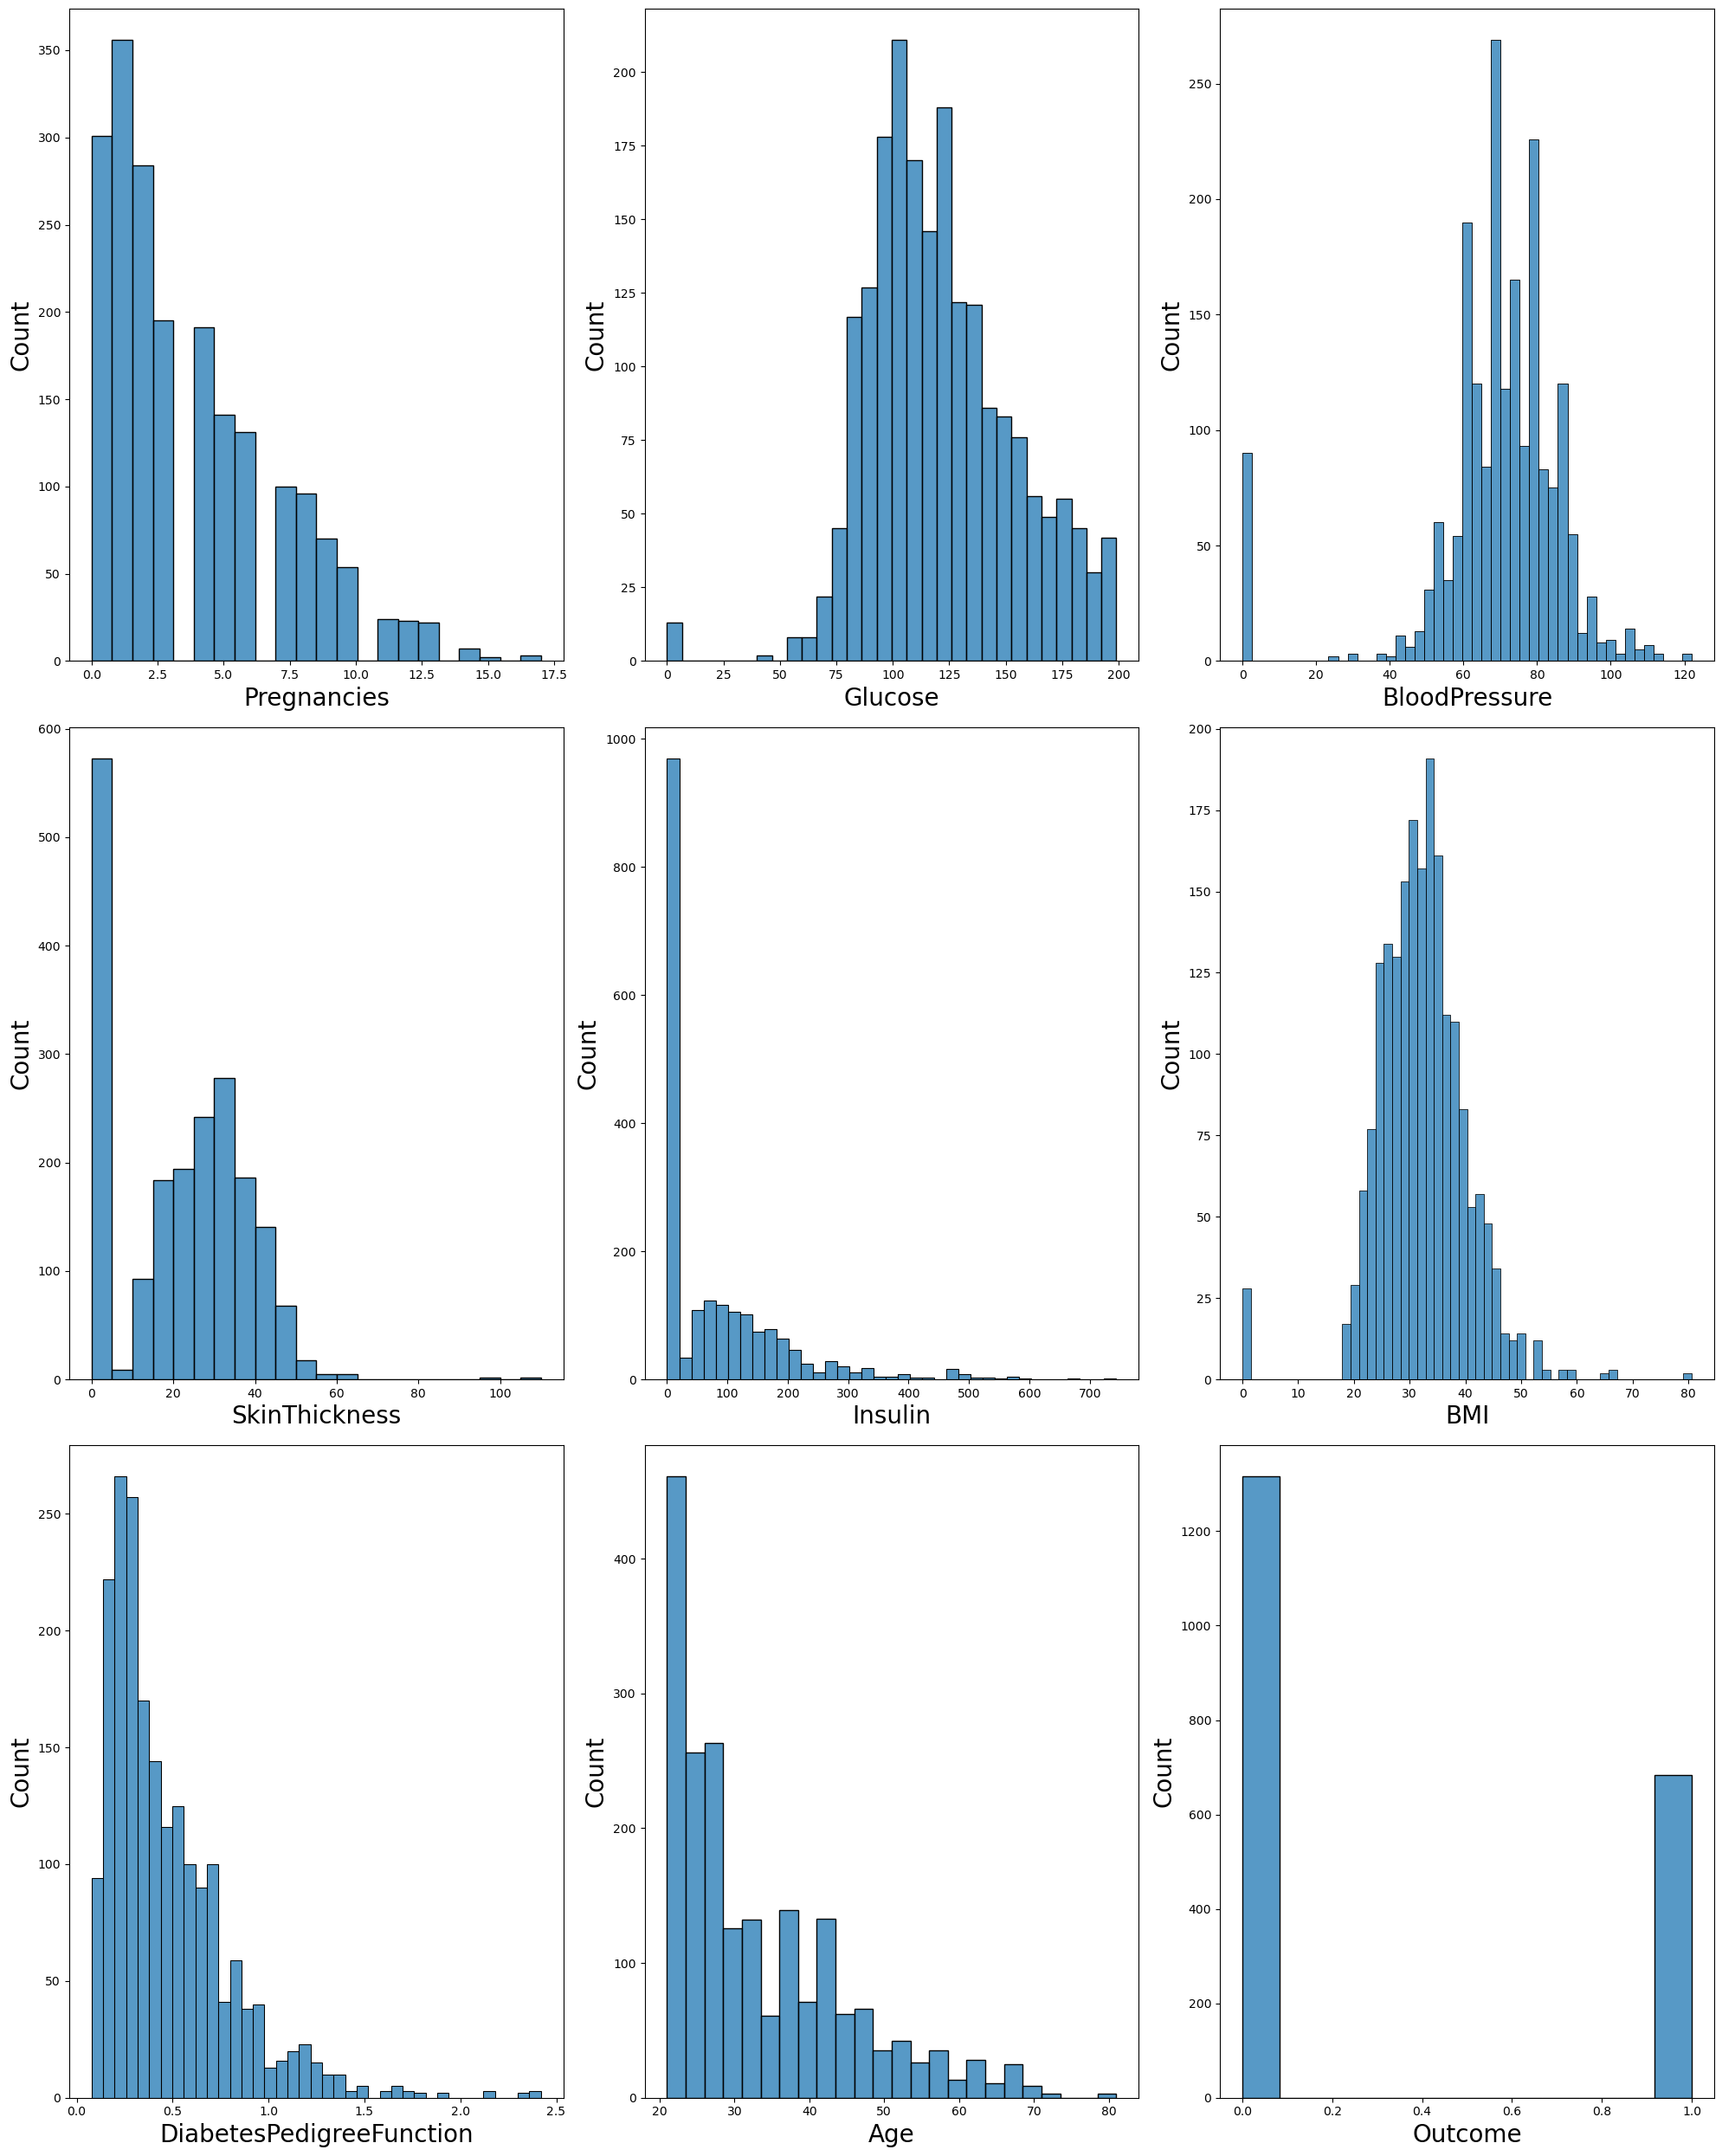

In [8]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Count",fontsize=20)

    plotnumber+=1
plt.tight_layout()

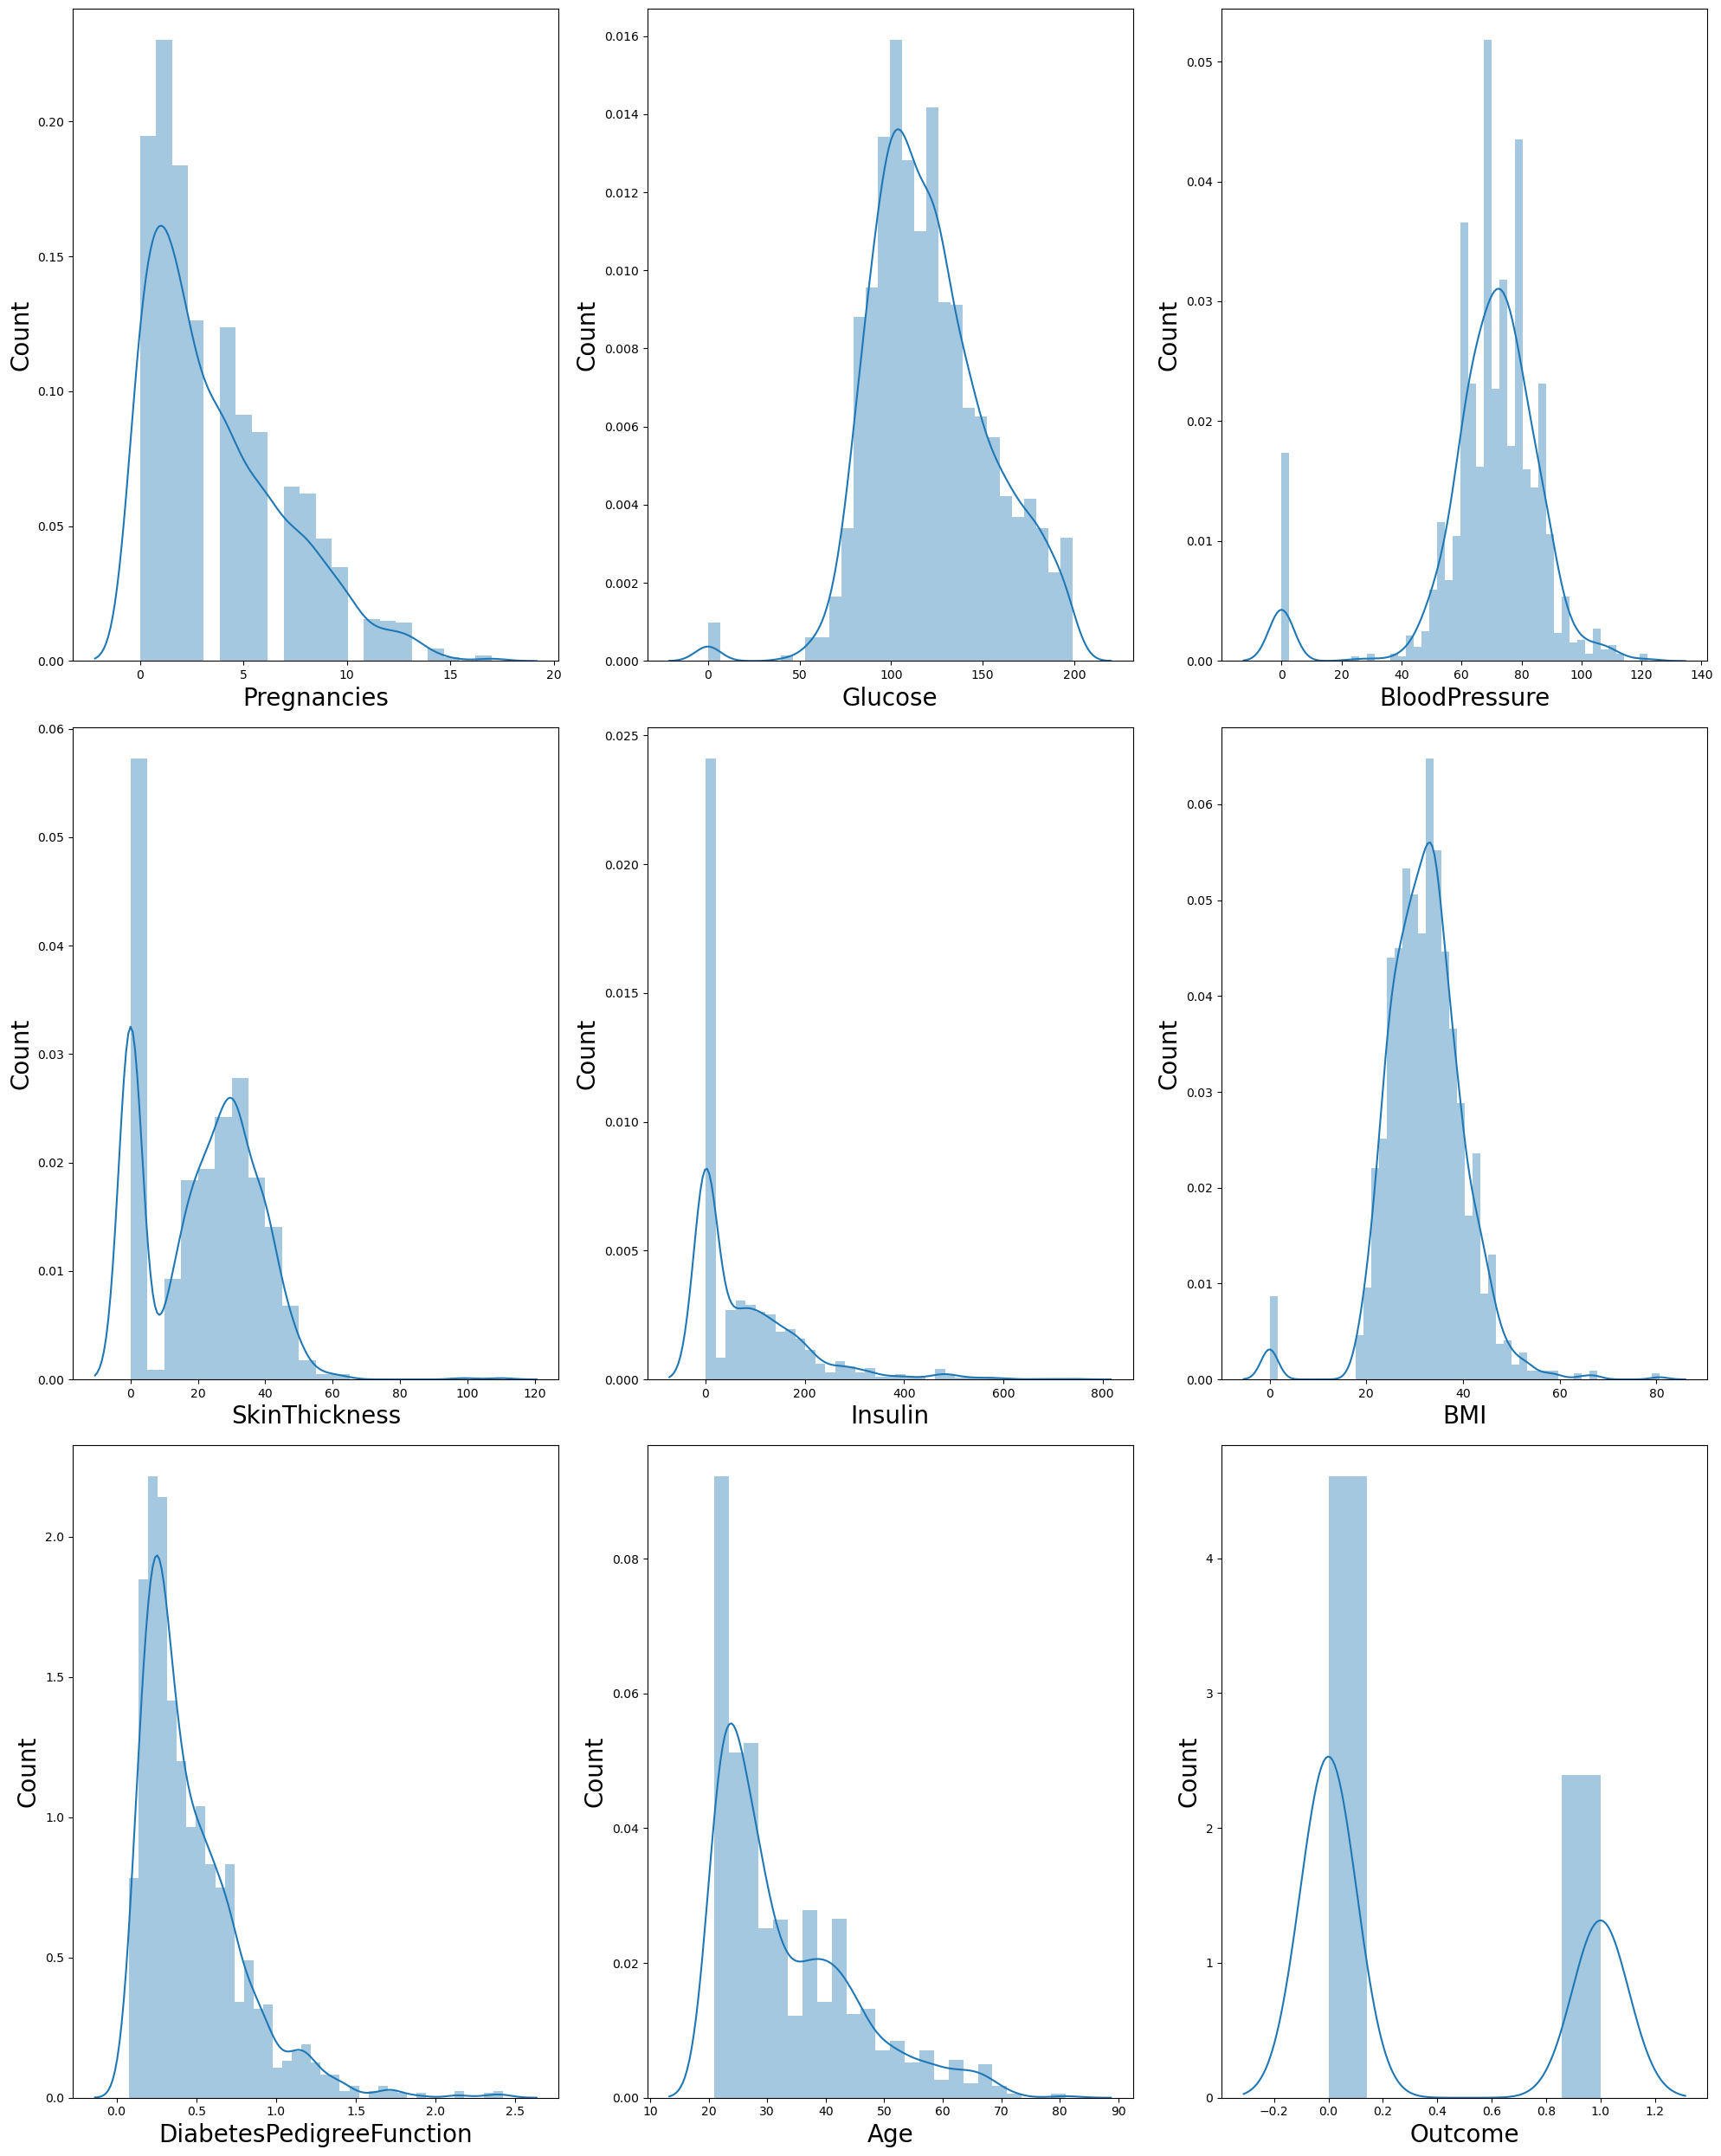

In [11]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Count",fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [12]:
for column in data:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [13]:
# Bivarient Analysis

In [14]:
data.loc[data["BMI"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,3,80,0,0,0,0.0,0.174,22,0
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [15]:
data.loc[data["BloodPressure"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,0,145,0,0,0,44.2,0.630,31,1
12,3,80,0,0,0,0.0,0.174,22,0
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
...,...,...,...,...,...,...,...,...,...
1870,7,105,0,0,0,0.0,0.305,24,0
1881,2,84,0,0,0,0.0,0.304,21,0
1899,0,131,0,0,0,43.2,0.270,26,1
1902,2,74,0,0,0,0.0,0.102,22,0


In [16]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [17]:

data['BMI'] = data['BMI'].replace(0,data['BMI'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].median())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].median())

In [18]:
data.loc[data["BloodPressure"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


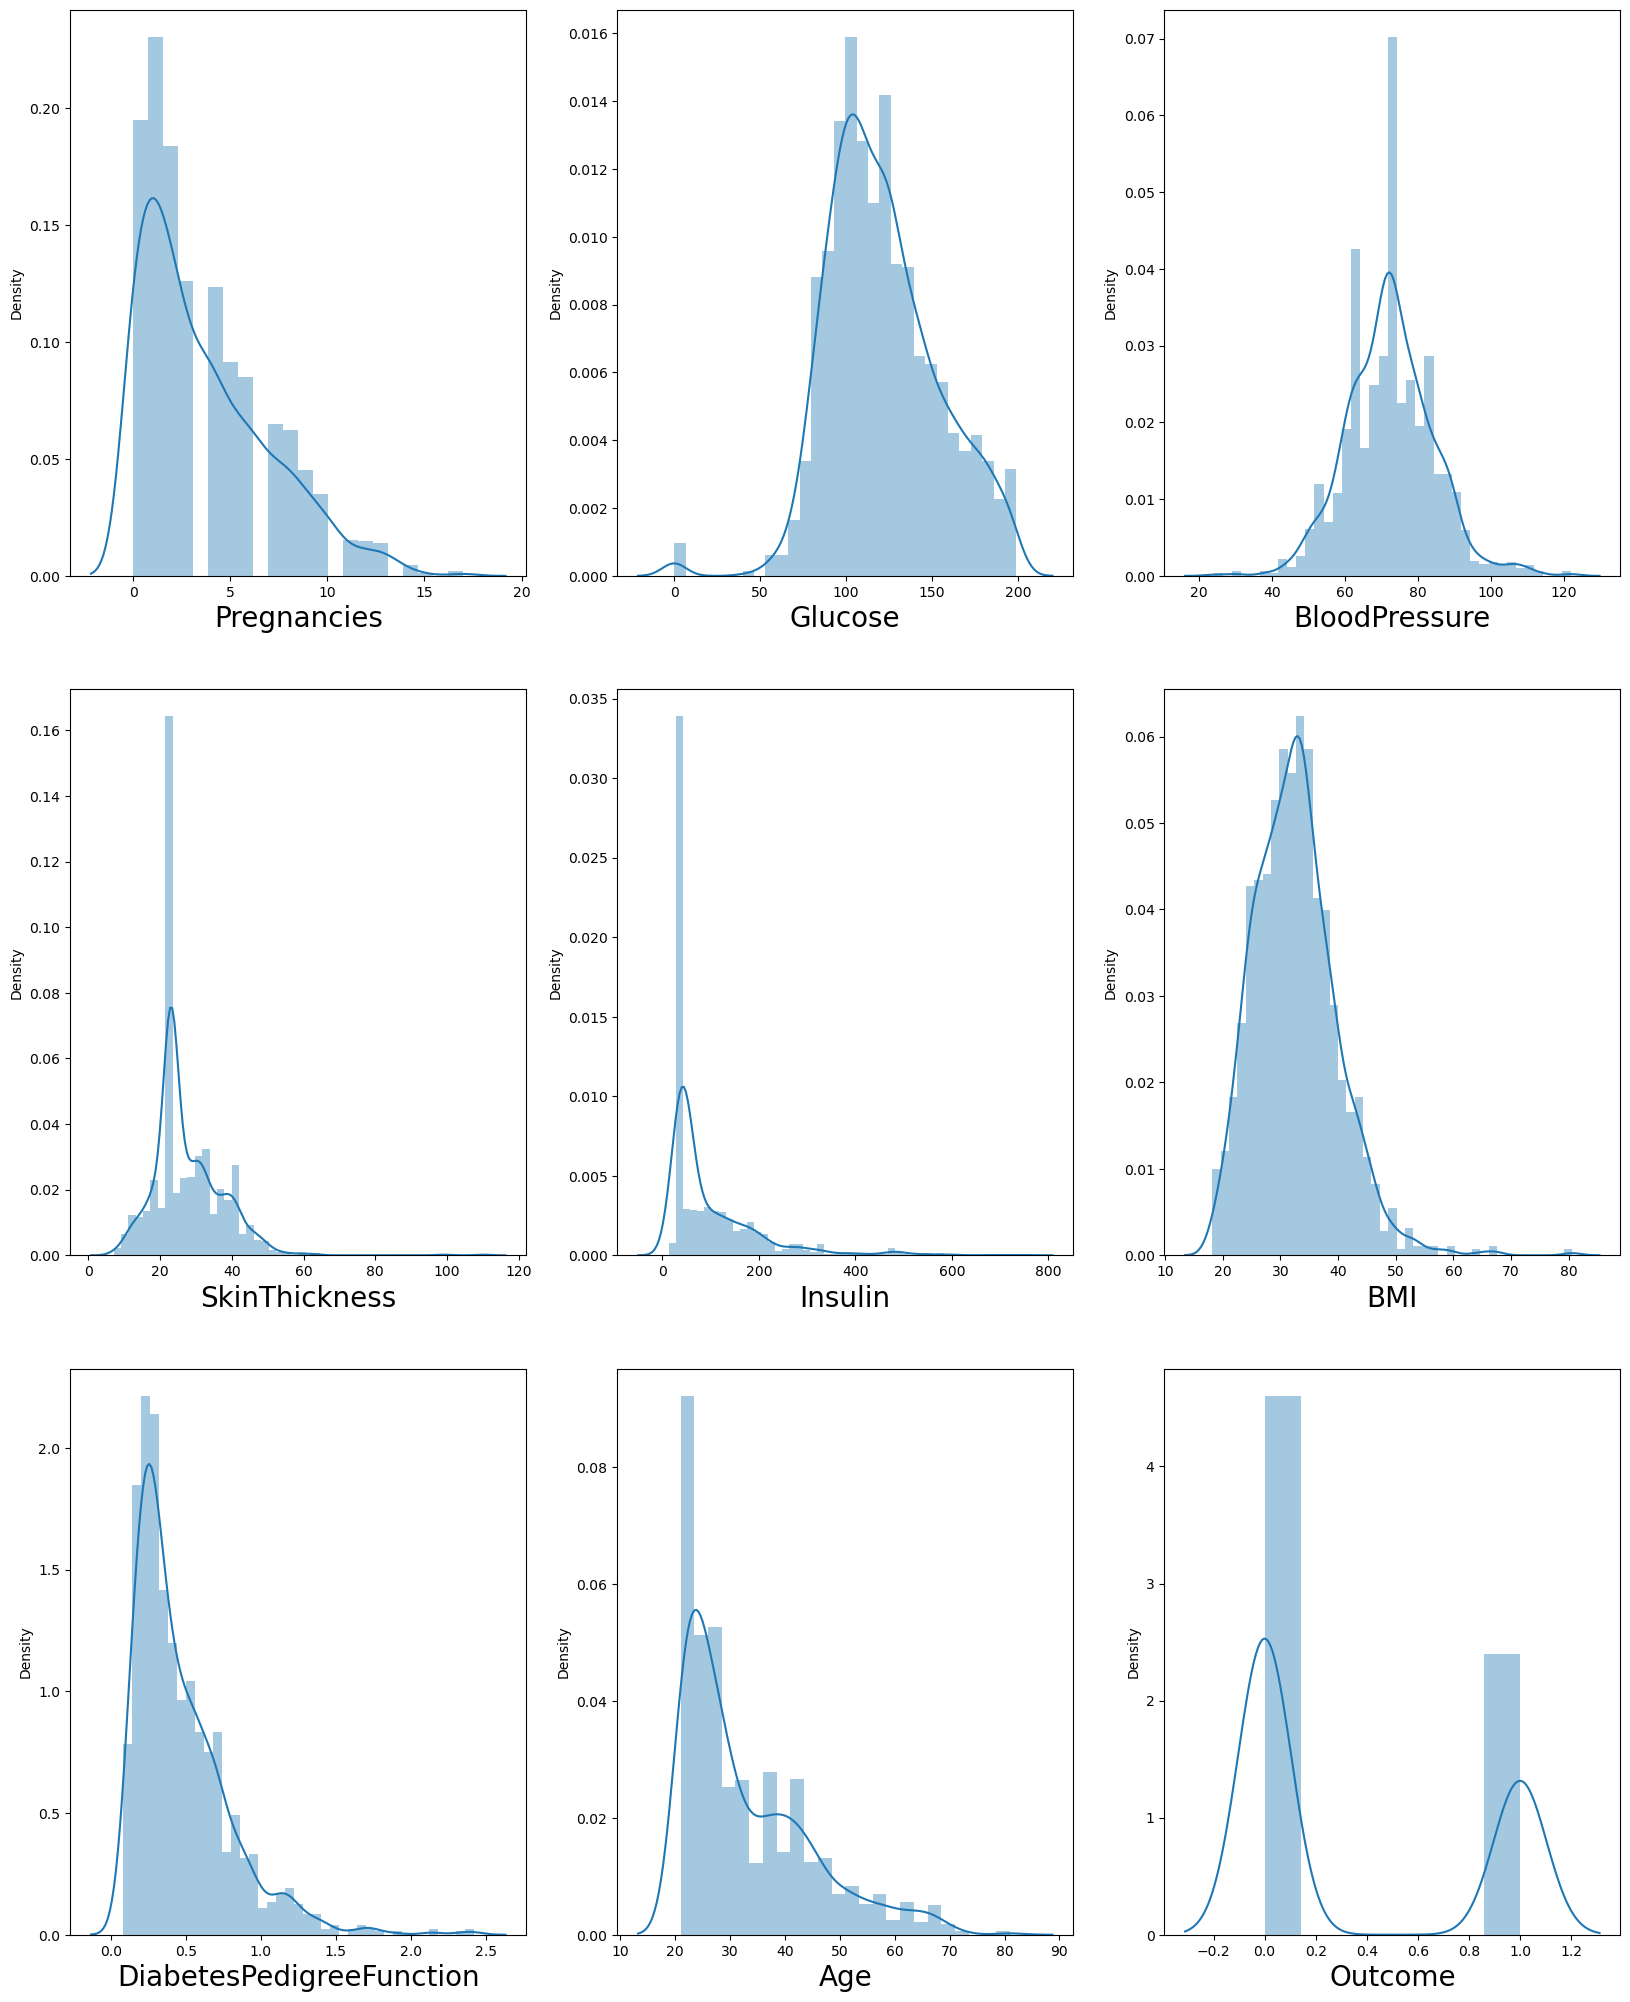

In [19]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# Model Creation

In [20]:
x = data.drop(columns = ['Outcome']) 
y = data['Outcome']

In [21]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,40,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,72,23,40,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,23,40,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [22]:
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [24]:
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)

In [25]:
x_scaled

array([[-0.5153943 ,  0.52455322, -0.86930967, ...,  0.13282408,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.1597562 ,  0.80477375, ...,  0.77273898,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.74288962, -0.03226796, ...,  1.60741059,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.12856529,  0.46995707, ..., -0.20104457,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.24383498,  3.14849054, ...,  4.79307391,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.25332895, -0.03226796, ..., -0.3540677 ,
         0.23516743, -0.68659705]])

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42)

In [27]:

error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))  

In [28]:
error_rate

[0.036, 0.118, 0.158, 0.188, 0.186, 0.202, 0.188, 0.216, 0.192, 0.204]

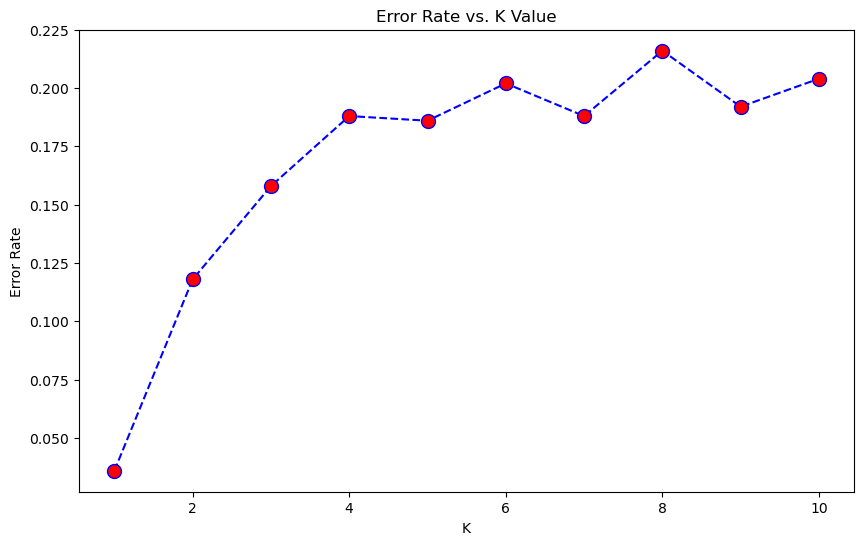

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [31]:
knn1 = KNeighborsClassifier(n_neighbors=5) 
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred = knn1.predict(x_test)

In [33]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [34]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.814


In [35]:
recall1=recall_score(y_test,y_pred)
recall1

0.6944444444444444

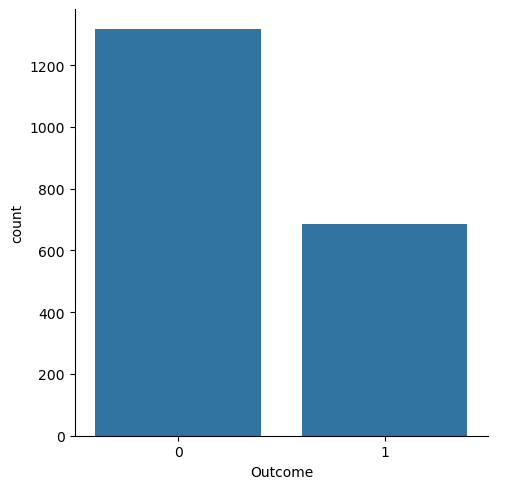

In [36]:
sns.catplot(x='Outcome',data=data,kind='count')

In [37]:
data.Outcome.value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [39]:
y_train.value_counts()

Outcome
0    996
1    504
Name: count, dtype: int64

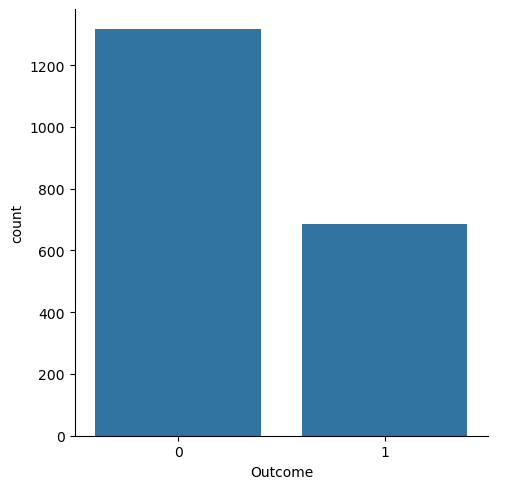

In [40]:
sns.catplot(x='Outcome',data=data,kind='count')

In [41]:
x_train_smote,y_train_smote=smote.fit_resample(x_train.astype('float'),y_train)

In [42]:
y=np.array(y_train_smote)

In [43]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [44]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 996, 1: 504})
SMOTE Classes Counter({0: 996, 1: 996})


In [45]:

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_smote, y_train_smote)

KNeighborsClassifier()

In [47]:
y_pred = knn2.predict(x_test)

In [48]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.834


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       320
           1       0.72      0.89      0.79       180

    accuracy                           0.83       500
   macro avg       0.82      0.85      0.83       500
weighted avg       0.85      0.83      0.84       500

